In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Load data
heart_data_raw = pd.read_excel("D:\\Mis Documentos\\Data Science Certificate\\Group Assigment\\Heart-Disease-Detection\\heart.xlsx")
heart_data_raw.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
#Validate missing values 
#There are no missing values for any of the columns
print('Check for NaNs')
print(heart_data_raw.isnull().any())

#Assessing the Skewness of data 
#All values between +- 2 which is considered acceptable
print('\n Check Skew')
print(heart_data_raw.skew())

#Statistics of original data
#303 observations for each variable (validates that there are no NaNs)
print('\n Summary Statistics')
heart_data_raw.describe()

Check for NaNs
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

 Check Skew
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

 Summary Statistics


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [6]:
#Check for outliers on continuous variables
#Outlier was defined as value exceeding 3 std (z score greater than 3) from the mean
#If an outlier was detected it was relaced with NaN and the observation was subsequently eliminated
def detect_outlier(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for x in range(0, len(data)):
        z_score= (data[x] - mean)/std
        if np.abs(z_score) > threshold:
            data[x] = np.nan
            
    return data

heart_data_no_outliers = heart_data_raw.copy()

heart_data_no_outliers['age'] = detect_outlier(heart_data_no_outliers['age'])
heart_data_no_outliers['trestbps'] = detect_outlier(heart_data_no_outliers['trestbps'])
heart_data_no_outliers['chol'] = detect_outlier(heart_data_no_outliers['chol'])
heart_data_no_outliers['thalach'] = detect_outlier(heart_data_no_outliers['thalach'])
heart_data_no_outliers['oldpeak'] = detect_outlier(heart_data_no_outliers['oldpeak'])

heart_data_no_outliers = heart_data_no_outliers.dropna()

#Rerun summary statistics with outliers removed
#Validate missing values 
#There are no missing values for any of the columns
print('Check for NaNs')
print(heart_data_no_outliers.isnull().any())

#Assessing the Skewness of data 
#All values between +- 2 which is considered acceptable
print('\n Check Skew')
print(heart_data_no_outliers.skew())

#Statistics with outliers removed
print('Summary Statistics')
heart_data_no_outliers.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Check for NaNs
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

 Check Skew
age        -0.172606
sex        -0.845655
cp          0.468668
trestbps    0.529652
chol        0.269087
fbs         2.012412
restecg     0.132950
thalach    -0.480430
exang       0.743629
oldpeak     1.012591
slope      -0.506177
ca          1.359237
thal       -0.455560
target     -0.220113
dtype: float64
Summary Statistics


age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    54.176871    0.693878    0.979592  131.057823  243.646259    0.146259   
std      9.112270    0.461667    1.035014   16.808093   45.854020    0.353968   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     60.750000    1.000000    2.000000  140.000000  273.000000    0.000000   
max     77.000000    1.000000    3.000000  180.000000  394.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean     0.537415  149.887755    0.326531    0.986054    1.414966    0.710884   
std      0.526073   22.490900    0.469743    1.075848    0.605363    1.012592   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  134.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.600000    1.000000    0.000000   
75%      1.000000  166.750000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    4.400000    2.000000    4.000000   

             thal      target  
count  294.000000  294.000000  
mean     2.299320    0.554422  
std      0.611773    0.497877  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [7]:
#Summary Statistics grouped by presence of heart disease 
#1 indicates heart disease 0 indicates no hear disease
heart_data_grouped = heart_data_no_outliers.groupby('target')
heart_data_grouped.aggregate([np.mean, np.std])

age                 sex                  cp            \
             mean       std      mean       std      mean       std   
target                                                                
0       56.473282  8.083533  0.847328  0.361052  0.496183  0.922989   
1       52.331288  9.489471  0.570552  0.496523  1.368098  0.955537   

          trestbps                   chol             ...     exang            \
              mean        std        mean        std  ...      mean       std   
target                                                ...                       
0       133.213740  17.346694  249.198473  45.912194  ...  0.557252  0.498618   
1       129.325153  16.208473  239.184049  45.456836  ...  0.141104  0.349202   

         oldpeak               slope                  ca                thal  \
            mean       std      mean       std      mean       std      mean   
target                                                                         
0       1.496947  1.172108  1.190840  0.542282  1.145038  1.031221  2.526718   
1       0.575460  0.781190  1.595092  0.594606  0.361963  0.852173  2.116564   

                  
             std  
target            
0       0.694243  
1       0.463383  

[2 rows x 26 columns]

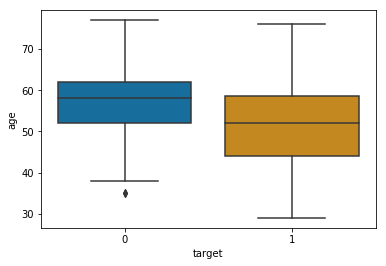

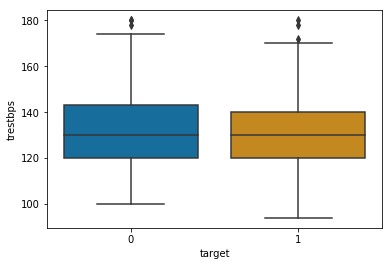

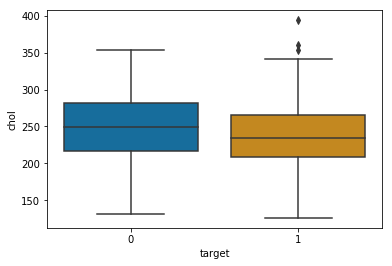

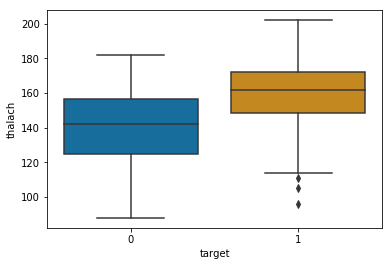

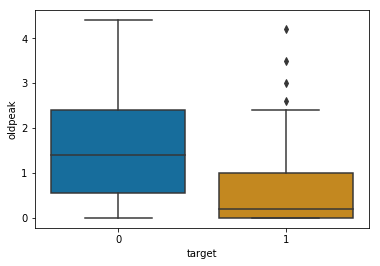

In [8]:
#created boxplots for continuous variables
sns.boxplot(y='age', x='target', data=heart_data_no_outliers,palette="colorblind")
plt.show()
sns.boxplot(y='trestbps', x='target', data=heart_data_no_outliers,palette="colorblind")
plt.show()
sns.boxplot(y='chol', x='target', data=heart_data_no_outliers,palette="colorblind")
plt.show()
sns.boxplot(y='thalach', x='target', data=heart_data_no_outliers,palette="colorblind")
plt.show()
sns.boxplot(y='oldpeak', x='target', data=heart_data_no_outliers,palette="colorblind")
plt.show()

In [ ]:
#Created bar graphs for categorical variables




In [ ]:
heart_data_raw.hist()

target    No  Yes
ageGroup         
Adult     94  130
Senior    44   35


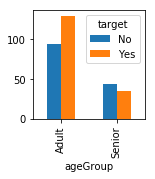

In [13]:
heart_data_subset = heart_data[['target','ageGroup', 'chol']].groupby(['target', 'ageGroup'])['chol'].count().unstack('target')

print(heart_data_subset)
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show()

In [ ]:
heart_data_subset = heart_data[['target','sex', 'chol']].groupby(['target', 'sex'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
plt.show();

In [ ]:
heart_data_subset = heart_data[['target','cp', 'chol']].groupby(['target', 'cp'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show();

In [ ]:
heart_data_subset = heart_data[['target', 'cp', 'chol']].groupby(['target', 'cp'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();
heart_data_subset

In [ ]:

heart_data_subset = heart_data[['target','restecg', 'chol']].groupby(['target', 'restecg'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();
heart_data_subset

In [ ]:
heart_data_subset = heart_data[['target','exang', 'chol']].groupby(['target', 'exang'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:

heart_data_subset = heart_data[['target','slope', 'chol']].groupby(['target', 'slope'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();


In [ ]:
heart_data_subset = heart_data[['target','ca', 'chol']].groupby(['target', 'ca'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:

heart_data_subset = heart_data[['target','thal', 'chol']].groupby(['target', 'thal'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:
# not sure what this shows
heart_data_subset = heart_data[['target','OldPeak2', 'chol']].groupby(['target', 'OldPeak2'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();


In [ ]:

# trestbps too many values
heart_data_subset = heart_data[['target','RestBloodPressure', 'chol']].groupby(['target', 'RestBloodPressure'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();



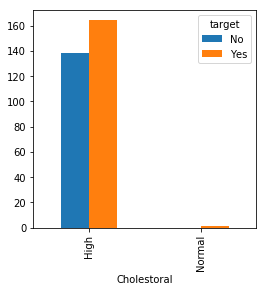

In [14]:
# chol too many values
heart_data_subset = heart_data[['target','Cholestoral', 'chol']].groupby(['target', 'Cholestoral'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:
# fbs both higher, not useful
heart_data_subset = heart_data[['target','fbs', 'chol']].groupby(['target', 'fbs'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:
# thalach too many values
heart_data_subset = heart_data[['target','MaxHeartRate', 'chol']].groupby(['target', 'MaxHeartRate'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(4,4))
plt.show();

In [ ]:
heart_data_subset = heart_data[['target','RestBloodPressure', 'chol']].groupby(['target', 'RestBloodPressure'])['chol'].count().unstack('target')
heart_data_subset.plot(kind='bar', legend = True, figsize=(2,2))
plt.show();

In [11]:
#Clean ups
heart_data = heart_data_raw.copy()

#Clean up by definition
heart_data['sex'] = ['Male' if x == 1 else 'Female' for x in heart_data['sex']]
heart_data['cp'] = ['Typical Angine' if x == 0 else 'Atypical angina' if x == 1 else 'Non-anginal pain' if x==2 else 'Asymptomatic' for x in heart_data['cp']]
heart_data['fbs'] = ['True' if x == 1 else 'False' for x in heart_data['fbs']]
heart_data['restecg'] = ['Normal' if x == 0 else 'STT wave abnormality' if x ==1 else 'Hypertrophy' for x in heart_data['restecg']]
heart_data['exang'] = ['Yes' if x == 1 else 'No' for x in heart_data['exang']]
heart_data['slope'] = ['Unsloping' if x == 1 else 'Flat' if x == 2 else 'Downsloping' for x in heart_data['slope']]
heart_data['thal'] = ['Normal' if x == 3 else 'Fixed defect' if x == 6 else 'reversable defect' for x in heart_data['thal']]
heart_data['target'] = ['No' if x == 0 else 'Yes' for x in heart_data['target']]

#Additional grouping
heart_data['ageGroup'] = ['Youth' if age < 19 else 'Senior' if age > 60 else 'Adult' for age in heart_data['age']]
heart_data['OldPeak2'] = ['Lower' if x < 0.8 else 'Higher' for x in heart_data['oldpeak']]

#Additional grouping from research
#assuming resting blood pressure is diastolic blood pressure. based on https://www.webmd.com/hypertension-high-blood-pressure/guide/diastolic-and-systolic-blood-pressure-know-your-numbers#1-3
heart_data['RestBloodPressure'] = ['High' if x < 120 else 'Hypertensive Crisis' for x in heart_data['trestbps']]
heart_data['Cholestoral'] = ['Normal' if x < 130 else 'High' for x in heart_data['chol']]
def calc_maxHeartRate (num):
    age, maxrate = num
    return 'Normal' if maxrate <= 220 -age else 'High'
heart_data['MaxHeartRate'] = heart_data[['age', 'thalach']].apply(calc_maxHeartRate, axis= 1)

heart_data.head()

age     sex                cp  trestbps  chol    fbs               restecg  \
0   63    Male      Asymptomatic       145   233   True                Normal   
1   37    Male  Non-anginal pain       130   250  False  STT wave abnormality   
2   41  Female   Atypical angina       130   204  False                Normal   
3   56    Male   Atypical angina       120   236  False  STT wave abnormality   
4   57  Female    Typical Angine       120   354  False  STT wave abnormality   

   thalach exang  oldpeak        slope  ca               thal target ageGroup  \
0      150    No      2.3  Downsloping   0  reversable defect    Yes   Senior   
1      187    No      3.5  Downsloping   0  reversable defect    Yes    Adult   
2      172    No      1.4         Flat   0  reversable defect    Yes    Adult   
3      178    No      0.8         Flat   0  reversable defect    Yes    Adult   
4      163   Yes      0.6         Flat   0  reversable defect    Yes    Adult   

  OldPeak2    RestBloodPressure Cholestoral MaxHeartRate  
0   Higher  Hypertensive Crisis        High       Normal  
1   Higher  Hypertensive Crisis        High         High  
2   Higher  Hypertensive Crisis        High       Normal  
3   Higher  Hypertensive Crisis        High         High  
4    Lower  Hypertensive Crisis        High       Normal